 # Clustering methods
We are going to use the following libraries and packages:

* **numpy**: "NumPy is the fundamental package for scientific computing with Python." (http://www.numpy.org/)
* **matplotlib**: "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." (https://matplotlib.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)
* **pandas**: "Pandas provides easy-to-use data structures and data analysis tools for Python." (https://pandas.pydata.org/)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 
import pandas as pd
import seaborn as sns

## Implementing clustering methods on synthetic data



## Synthetic data 

Let's generate synthetic data as follows:
1) Points are scattered in 2 dimensional space as follows. There are N-2 other dimensions that all the points have same values in each dimension
2) We will reduce the dimensionality of the data to 2D


Text(0, 0.5, '2nd dimension')

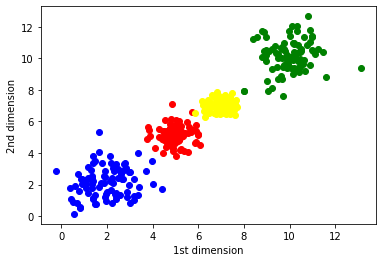

In [ ]:
group_1_X = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)
group_1_Y = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)

group_2_X = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)
group_2_Y = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)

group_3_X = np.repeat(5,90)+np.random.normal(loc=0, scale=0.5,size=90)
group_3_Y = np.repeat(5,90)+np.random.normal(loc=0, scale=0.5,size=90)


group_4_X = np.repeat(7,90)+np.random.normal(loc=0, scale=0.4,size=90)
group_4_Y = np.repeat(7,90)+np.random.normal(loc=0, scale=0.4,size=90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.scatter(group_3_X,group_3_Y,c='red')
plt.scatter(group_4_X,group_4_Y,c='yellow')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

Text(0.5, 1.0, 'DBSCAN')

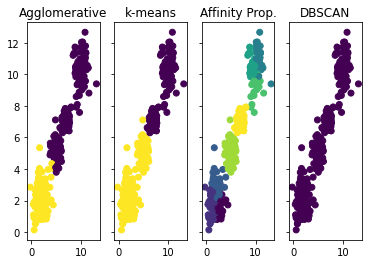

In [ ]:
####
combined1 = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
combined2 = pd.DataFrame(np.column_stack((np.concatenate([group_3_X,group_4_X]),np.concatenate([group_3_Y,group_4_Y]))))
combined= combined1.append(combined2)
####
from sklearn import cluster

combined_AC = cluster.AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete').fit(combined)
combined_KMeans = cluster.KMeans(n_clusters=2,max_iter=300).fit(combined)
combined_AP = cluster.AffinityPropagation( max_iter=200, convergence_iter=5).fit(combined)
combined_DB = cluster.DBSCAN(eps=0.001, min_samples=2).fit(combined)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

ax1.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AC.labels_)
ax1.set_title('Agglomerative')

ax2.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_KMeans.labels_)
ax2.set_title('k-means')

ax3.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AP.labels_)
ax3.set_title('Affinity Prop.')

ax4.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_DB.labels_)
ax4.set_title('DBSCAN')

### Let's change the structure of synthetic data

Let's generate synthetic data as follows:

Text(0, 0.5, '2nd dimension')

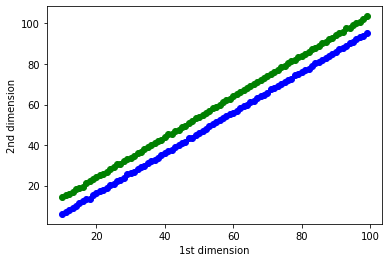

In [ ]:
group_1_X = np.arange(10,100)
group_1_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)-np.repeat(4,90)

group_2_X = np.arange(10,100)
group_2_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)+np.repeat(4,90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Text(0.5, 1.0, 'DBSCAN')

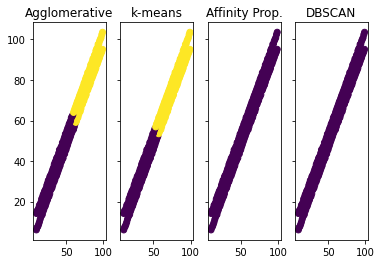

In [ ]:
####
combined = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
####
from sklearn import cluster

combined_AC = cluster.AgglomerativeClustering(n_clusters=2,affinity='l2', linkage='complete').fit(combined)
combined_KMeans = cluster.KMeans(n_clusters=2,max_iter=400).fit(combined)
combined_AP = cluster.AffinityPropagation(damping=0.6, max_iter=35, convergence_iter=15).fit(combined)
combined_DB = cluster.DBSCAN(eps=0.7, min_samples=5).fit(combined)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

ax1.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AC.labels_)
ax1.set_title('Agglomerative')

ax2.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_KMeans.labels_)
ax2.set_title('k-means')

ax3.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AP.labels_)
ax3.set_title('Affinity Prop.')

ax4.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_DB.labels_)
ax4.set_title('DBSCAN')


### Another synthetic data

Let's generate synthetic data as follows:


(0.0, 2.5)

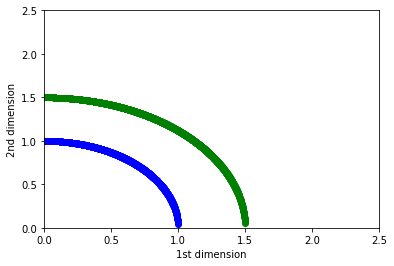

In [ ]:
group_1_X = np.arange(start=0,stop=1**2,step=0.001)
group_1_Y = np.sqrt(np.repeat(1**2,1000)-group_1_X**2)

group_2_X = np.arange(start=0,stop=1.5,step=0.001)
group_2_Y = np.sqrt(np.repeat(1.5**2,1500)-group_2_X**2)

plt.scatter(group_1_X,group_1_Y, c='blue', )
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.xlim(0,2.5)
plt.ylim(0,2.5)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Text(0.5, 1.0, 'DBSCAN')

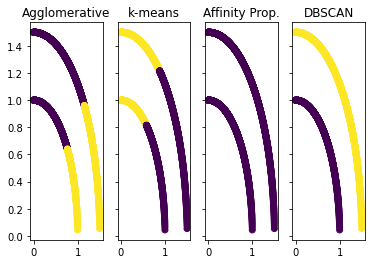

In [ ]:
combined = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
####
from sklearn import cluster

combined_AC = cluster.AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete').fit(combined)
combined_KMeans = cluster.KMeans(n_clusters=2,max_iter=300).fit(combined)
combined_AP = cluster.AffinityPropagation( max_iter=300, convergence_iter=15).fit(combined)
combined_DB = cluster.DBSCAN(eps=0.1, min_samples=5).fit(combined)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

ax1.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AC.labels_)
ax1.set_title('Agglomerative')

ax2.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_KMeans.labels_)
ax2.set_title('k-means')

ax3.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AP.labels_)
ax3.set_title('Affinity Prop.')

ax4.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_DB.labels_)
ax4.set_title('DBSCAN')

### Conclusion:
* There is no best model for all cases
* Hypeparameters of the models are the major players in the quality of clustering.

## UCI ML digit image data

* load and return digit data set

In [ ]:
from sklearn import datasets

# Loading digit images
digits = datasets.load_digits()

X = pd.DataFrame(digits.data).iloc[0:100,]
y = digits.target[0:100]
n_samples, n_features = X.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 100
number of features: 64


Pixels of images have values between 0 and 16.
Chacking varaince of each feature across samples is informative.

Let's write a function to use it for visualization of the results of all the dimension reduction methods.

#### Let's visualize some of the images

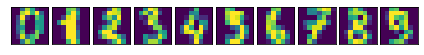

In [ ]:
fig, ax_array = plt.subplots(1,10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i])
plt.setp(axes, xticks=[], yticks=[])
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Now that we understood how different clustering methods works, let's implement it on the UCI ML digit image data:

In [ ]:
import collections
from sklearn import metrics

UCIML_AC = cluster.AgglomerativeClustering(n_clusters=10,affinity='euclidean', linkage='single').fit(X)
UCIML_KMeans = cluster.KMeans(n_clusters=10,max_iter=1000).fit(X)
UCIML_AP = cluster.AffinityPropagation( max_iter=200, convergence_iter=15).fit(X)
UCIML_DB = cluster.DBSCAN(eps=0.5, min_samples=5).fit(X)


In [ ]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

Let's check the clusters using proper visualiation:

     0    1    2    3    4    5    6   7   8    9
0  121  121  121  110  121  132  110  88  77   99
1  132  132  132  120  132  144  120  96  84  108
2  110  110  110  100  110  120  100  80  70   90
3  132  132  132  120  132  144  120  96  84  108
4   88   88   88   80   88   96   80  64  56   72
5   99   99   99   90   99  108   90  72  63   81
6  121  121  121  110  121  132  110  88  77   99
7  110  110  110  100  110  120  100  80  70   90
8   88   88   88   80   88   96   80  64  56   72
9   99   99   99   90   99  108   90  72  63   81


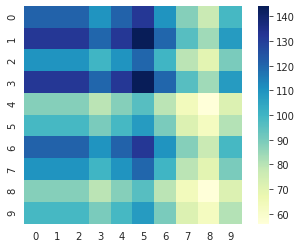

In [ ]:

conf_frame = pd.DataFrame(0,index=np.arange(0,10), columns=np.arange(0,10))
for i in y:
  for j in UCIML_KMeans.labels_:
    conf_frame.iloc[i,j] = conf_frame.iloc[i,j]+1

print(conf_frame)


import seaborn as sns

with sns.axes_style("white"):
    ax = sns.heatmap(conf_frame, square=True,  cmap="YlGnBu")
    plt.show()

## Normalizing data before clustering

It is a good idea usually to normalize the data so that the scale of values for different features would become similar. 

In [ ]:
from sklearn import preprocessing
X_norm = pd.DataFrame(preprocessing.scale(X)) 

UCIML_AC = cluster.AgglomerativeClustering(n_clusters=10,affinity='euclidean', linkage='complete').fit(X_norm)
UCIML_KMeans = cluster.KMeans(n_clusters=10,max_iter=1000).fit(X_norm)
UCIML_AP = cluster.AffinityPropagation( max_iter=200, convergence_iter=15).fit(X_norm)
UCIML_DB = cluster.DBSCAN(eps=0.01, min_samples=5).fit(X_norm)

     0    1    2   3    4   5   6   7   8   9
0  374  121  308  77  121  11  44  11  22  11
1  408  132  336  84  132  12  48  12  24  12
2  340  110  280  70  110  10  40  10  20  10
3  408  132  336  84  132  12  48  12  24  12
4  272   88  224  56   88   8  32   8  16   8
5  306   99  252  63   99   9  36   9  18   9
6  374  121  308  77  121  11  44  11  22  11
7  340  110  280  70  110  10  40  10  20  10
8  272   88  224  56   88   8  32   8  16   8
9  306   99  252  63   99   9  36   9  18   9


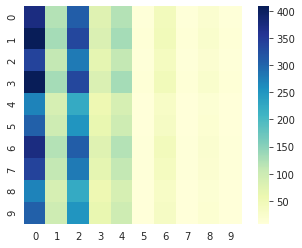

In [ ]:
conf_frame = pd.DataFrame(0,index=np.arange(0,10), columns=np.arange(0,10))
for i in y:
  for j in UCIML_AC.labels_:
    conf_frame.iloc[i,j] = conf_frame.iloc[i,j]+1

print(conf_frame)


import seaborn as sns

with sns.axes_style("white"):
    ax = sns.heatmap(conf_frame, square=True,  cmap="YlGnBu")
    plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
data = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
data['target']=bc_data.target
sns.clustermap(data,figsize=(300,400)) # Perform hierarchical/agglomerative clustering.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


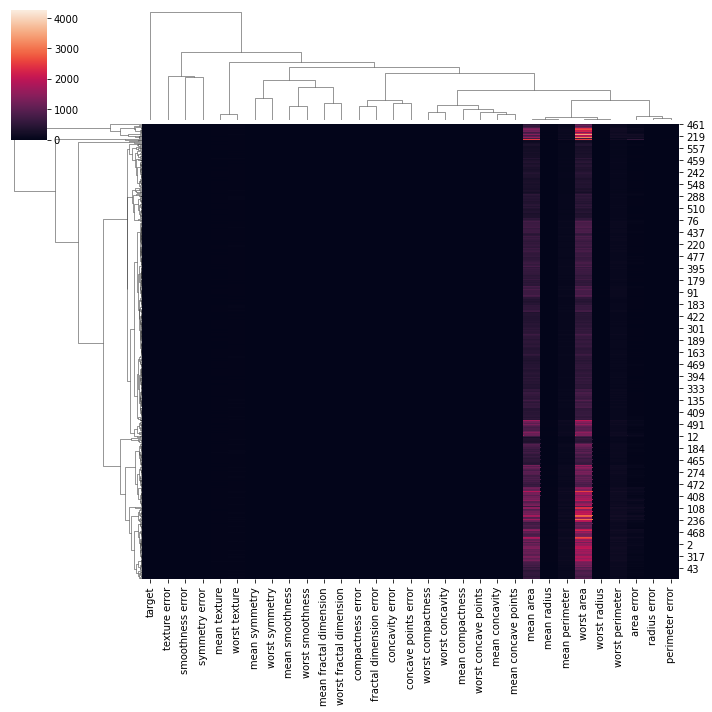

In [ ]:
sns.clustermap(data, metric="correlation")

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


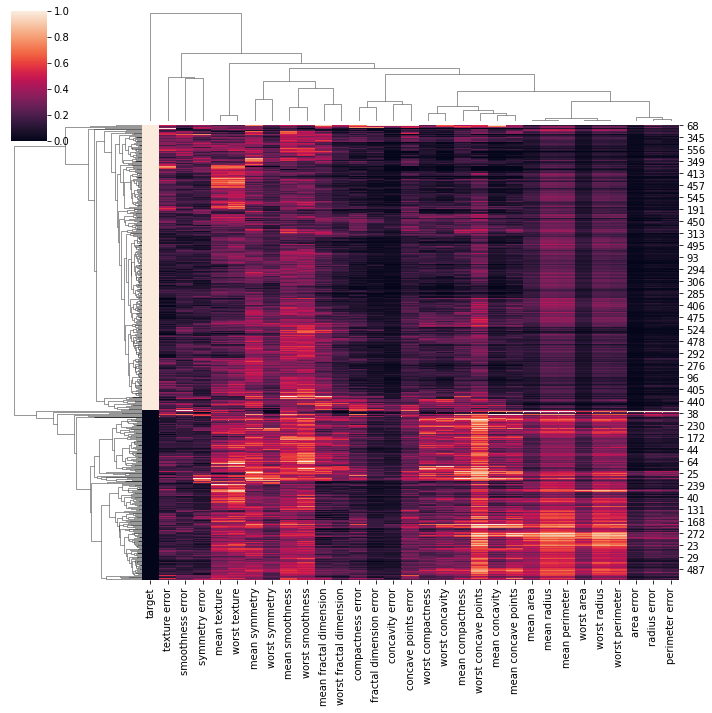

In [ ]:
sns.clustermap(data,
               metric="correlation",
               standard_scale=1)